In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')

**ANÁLISE EXPLORATÓRIA DO DATASET**

In [3]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df_test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


**SIGNIFICADO DAS SIGLAS/ COLUNAS**

1. FAVC - Se o cara faz consumo frequente de alimentos muito calóricos no dia a dia
2. FCVC - Frequência de consumo de vegetais
3. NCP - Número de refeições principais (Geralmente são café da manhã, almoço e janta)
4. CAEC - Consumo de alimentos entre essas refeições principais (O famoso lanchinho)
5. SMOKE - Fumante ou não fumante
6. CH20 - Quanto de água bebe por dia
7. SCC - Se a pessoa faz o monitoramento do consumo de calorias
8. FAF - Frequência de atividade física (De hoje tá pago ou não tá???)
9. TUE - Tempo de tela/ de uso de dispositivos tecnológicos
11. Principal meio de transporte utilizado no dia a dia
12. NOBeyesdad - Classificação do nível de obesidade

In [5]:
df.shape

(20758, 18)

In [6]:
df_test.shape

(13840, 17)

In [7]:
df.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [8]:
df_test.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
dtype: object

In [9]:
df = df.drop('id', axis=1)
test_id = df_test['id']
df_test = df_test.drop('id', axis=1)

In [10]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [11]:
df_test.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [12]:
df_test.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [13]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [14]:
df.nunique()

Gender                               2
Age                               1703
Height                            1833
Weight                            1979
family_history_with_overweight       2
FAVC                                 2
FCVC                               934
NCP                                689
CAEC                                 4
SMOKE                                2
CH2O                              1506
SCC                                  2
FAF                               1360
TUE                               1297
CALC                                 3
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [15]:
df_test.nunique()

Gender                               2
Age                               1539
Height                            1739
Weight                            1798
family_history_with_overweight       2
FAVC                                 2
FCVC                               828
NCP                                649
CAEC                                 4
SMOKE                                2
CH2O                              1366
SCC                                  2
FAF                               1260
TUE                               1172
CALC                                 4
MTRANS                               5
dtype: int64

In [16]:
duplicatas = df_test.duplicated()
num_duplicatas = duplicatas.sum()
print("Total de duplicatas:", num_duplicatas)

Total de duplicatas: 0


In [17]:
duplicatas = df.duplicated()
num_duplicatas = duplicatas.sum()
print("Total de duplicatas:", num_duplicatas)

Total de duplicatas: 0


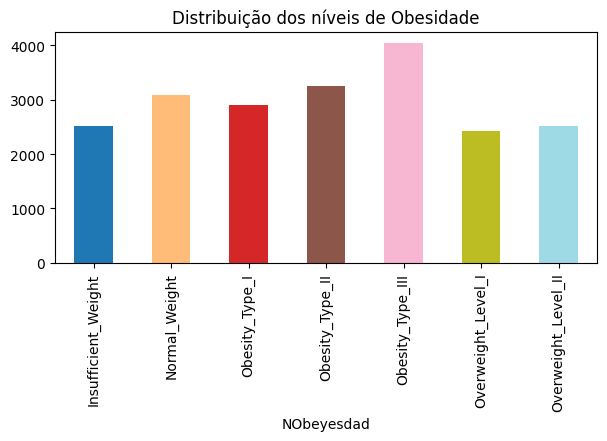

In [18]:
cmap = plt.get_cmap('tab20', df['NObeyesdad'].nunique())

ax = df['NObeyesdad'].value_counts().sort_index()\
    .plot(kind='bar',
          title='Distribuição dos níveis de Obesidade',
          figsize=(7, 3),
          color=[cmap(i) for i in range(df['NObeyesdad'].nunique())])

ax.set_xlabel('NObeyesdad')
plt.show()

In [19]:
count_nobeyesdad = df['NObeyesdad'].value_counts().sort_index()
print(count_nobeyesdad)


NObeyesdad
Insufficient_Weight    2523
Normal_Weight          3082
Obesity_Type_I         2910
Obesity_Type_II        3248
Obesity_Type_III       4046
Overweight_Level_I     2427
Overweight_Level_II    2522
Name: count, dtype: int64


****

**PRÉ-PROCESSAMENTO**

In [20]:
colunas_categoricas = df.select_dtypes(include = ['object'])
colunas_categoricas

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,yes,yes,Frequently,no,no,no,Automobile,Normal_Weight
2,Female,yes,yes,Sometimes,no,no,no,Public_Transportation,Insufficient_Weight
3,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
20753,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,no,yes,Frequently,no,no,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,yes,yes,Sometimes,no,no,no,Public_Transportation,Obesity_Type_II
20756,Male,yes,yes,Sometimes,no,no,no,Automobile,Overweight_Level_II


In [21]:
colunas_categoricas_test = df_test.select_dtypes(include = ['object'])
colunas_categoricas_test

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
1,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
2,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
3,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
4,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...
13835,Male,yes,no,Sometimes,no,no,Sometimes,Public_Transportation
13836,Female,no,yes,Sometimes,no,no,Sometimes,Public_Transportation
13837,Female,no,yes,Frequently,no,no,Sometimes,Public_Transportation
13838,Male,yes,yes,Sometimes,no,no,no,Public_Transportation


In [22]:
df['NObeyesdad'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [23]:
dictionary = {'Insufficient_Weight': '0',
              'Normal_Weight': '1',
              'Overweight_Level_I' : '2',
              'Overweight_Level_II': '3',
              'Obesity_Type_I': '4',
              'Obesity_Type_II': '5',
              'Obesity_Type_III': '6'        
    
}

In [24]:
df['NObeyesdad'] = df['NObeyesdad'].replace(dictionary).astype('int64')
df['NObeyesdad'].unique()

array([3, 1, 0, 6, 5, 2, 4])

In [25]:
df['CAEC'].unique()

array(['Sometimes', 'Frequently', 'no', 'Always'], dtype=object)

In [26]:
df_test['CAEC'].unique()

array(['Sometimes', 'Always', 'Frequently', 'no'], dtype=object)

In [27]:
df['CALC'].unique()

array(['Sometimes', 'no', 'Frequently'], dtype=object)

In [28]:
df_test['CALC'].unique()

array(['Sometimes', 'no', 'Frequently', 'Always'], dtype=object)

In [29]:
caecdictionary = {'no': '0',
                  'Sometimes': '1',
                  'Frequently': '2',
                  'Always': '3'   
}

In [30]:
df['CAEC'] = df['CAEC'].replace(caecdictionary).astype(int)
df['CAEC'].unique()

array([1, 2, 0, 3])

In [31]:
df_test['CAEC'] = df_test['CAEC'].replace(caecdictionary).astype(int)
df_test['CAEC'].unique()

array([1, 3, 2, 0])

In [32]:
calcdictionary = {'no': '0',
                  'Sometimes': '1',
                  'Frequently': '2',
                  'Always': '3'   
}

In [33]:
df['CALC'] = df['CALC'].replace(calcdictionary).astype(int)
df['CALC'].unique()

array([1, 0, 2])

In [34]:
df_test['CALC'] = df_test['CALC'].replace(calcdictionary).astype(int)
df_test['CALC'].unique()

array([1, 0, 2, 3])

In [35]:
df_test['MTRANS'].unique()

array(['Public_Transportation', 'Automobile', 'Walking', 'Bike',
       'Motorbike'], dtype=object)

In [36]:
df['MTRANS'].unique()

array(['Public_Transportation', 'Automobile', 'Walking', 'Motorbike',
       'Bike'], dtype=object)

In [37]:
mtransdictionary = {'Bike': '0',
              'Walking': '1',
              'Motorbike': '2',
              'Automobile': '3',
              'Public_Transportation': '4'          
}

In [38]:
df['MTRANS'] = df['MTRANS'].replace(mtransdictionary).astype('int64')
df['MTRANS'].unique()

array([4, 3, 1, 2, 0])

In [39]:
df_test['MTRANS'] = df_test['MTRANS'].replace(mtransdictionary).astype('int64')
df_test['MTRANS'].unique()

array([4, 3, 1, 0, 2])

In [40]:
colunas_categoricas_test = df_test.select_dtypes(include = ['object'])
colunas_categoricas_test.columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC'], dtype='object')

In [41]:
colunas_categoricas = df.select_dtypes(include = ['object'])
colunas_categoricas.columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC'], dtype='object')

In [42]:
df = pd.get_dummies(df)
df_test = pd.get_dummies(df_test)

In [43]:
df.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes', 'SMOKE_no',
       'SMOKE_yes', 'SCC_no', 'SCC_yes'],
      dtype='object')

In [44]:
df_test.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes', 'SMOKE_no',
       'SMOKE_yes', 'SCC_no', 'SCC_yes'],
      dtype='object')

In [45]:
df = df.drop(columns=['Gender_Male', 
                      'family_history_with_overweight_no', 
                      'FAVC_no', 
                      'SMOKE_no',
                      'SCC_no'                       
])

In [46]:
df.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'Gender_Female',
       'family_history_with_overweight_yes', 'FAVC_yes', 'SMOKE_yes',
       'SCC_yes'],
      dtype='object')

In [47]:
df_test = df_test.drop(columns=['Gender_Male', 
                      'family_history_with_overweight_no', 
                      'FAVC_no', 
                      'SMOKE_no',
                      'SCC_no'                       
])

In [48]:
df_test.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'Gender_Female', 'family_history_with_overweight_yes',
       'FAVC_yes', 'SMOKE_yes', 'SCC_yes'],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 20758 non-null  float64
 1   Height                              20758 non-null  float64
 2   Weight                              20758 non-null  float64
 3   FCVC                                20758 non-null  float64
 4   NCP                                 20758 non-null  float64
 5   CAEC                                20758 non-null  int64  
 6   CH2O                                20758 non-null  float64
 7   FAF                                 20758 non-null  float64
 8   TUE                                 20758 non-null  float64
 9   CALC                                20758 non-null  int64  
 10  MTRANS                              20758 non-null  int64  
 11  NObeyesdad                          20758

In [50]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 13840 non-null  float64
 1   Height                              13840 non-null  float64
 2   Weight                              13840 non-null  float64
 3   FCVC                                13840 non-null  float64
 4   NCP                                 13840 non-null  float64
 5   CAEC                                13840 non-null  int64  
 6   CH2O                                13840 non-null  float64
 7   FAF                                 13840 non-null  float64
 8   TUE                                 13840 non-null  float64
 9   CALC                                13840 non-null  int64  
 10  MTRANS                              13840 non-null  int64  
 11  Gender_Female                       13840

**MATRIZ DE CORRELAÇÃO**

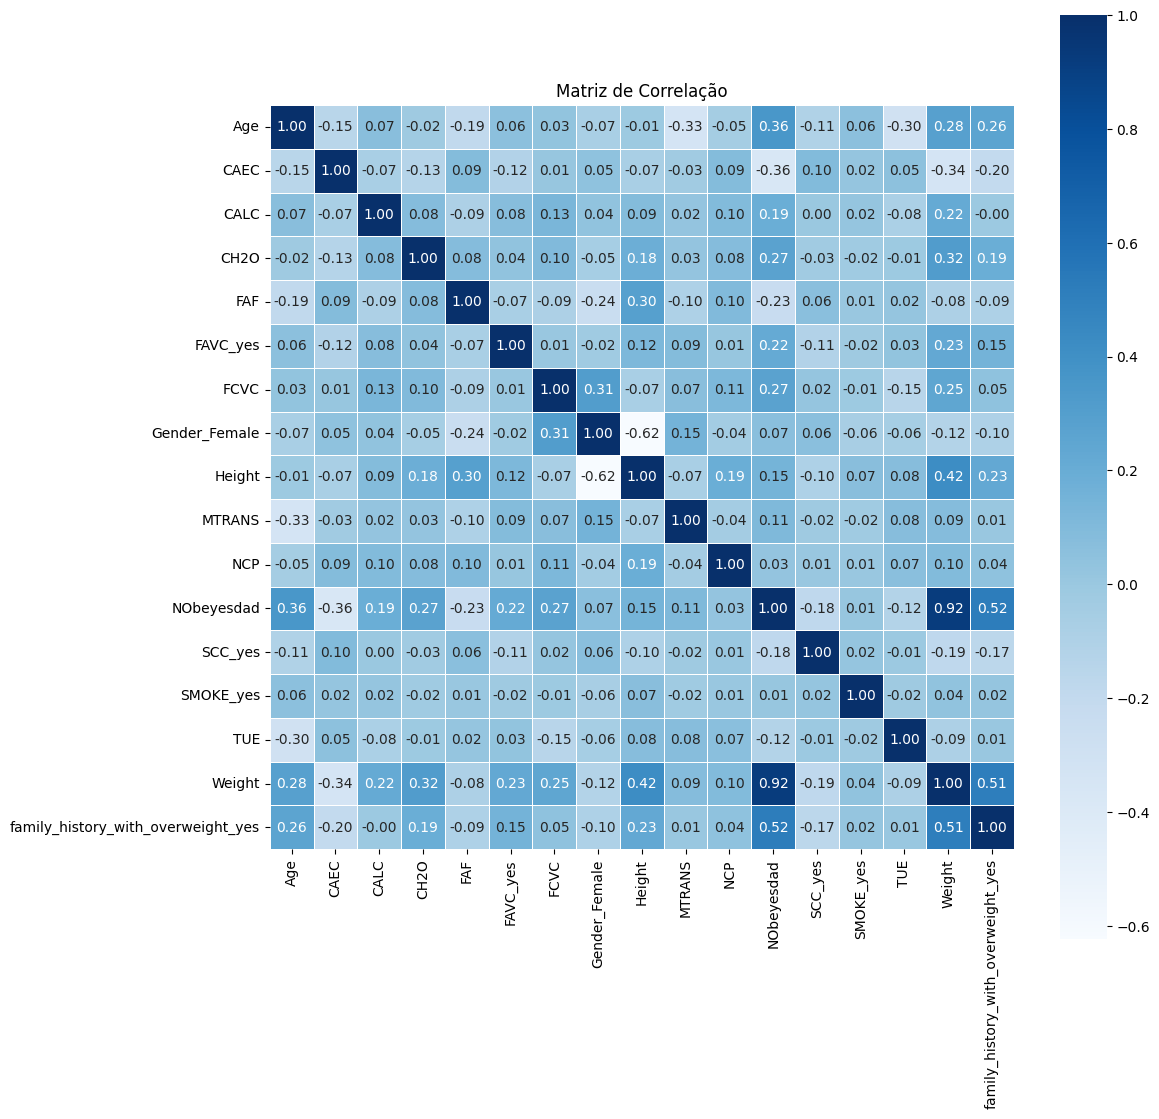

In [51]:
df = df.astype(float)
df_test = df_test.astype(float)

conf_matriz = df.corr()

sorted_corr = conf_matriz['NObeyesdad'].sort_index(ascending=True)
corr_columns = sorted_corr.index

subset_conf_matriz = conf_matriz.loc[corr_columns, corr_columns]

plt.figure(figsize=(12,12))
sns.heatmap(subset_conf_matriz, annot=True, cmap='Blues', linewidths=0.5, fmt=".2f", square=True)

plt.title("Matriz de Correlação")
plt.show()

In [52]:
x = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

**CRIANDO O MODELO GBM**

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, stratify=y, random_state=3361)

In [54]:
from xgboost import XGBClassifier
XGB = XGBClassifier(random_state=3361)
XGB.fit(x_train, y_train)
y_pred = XGB.predict(x_val)

In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(classification_report(y_pred, y_val))
print("A acurácia do modelo foi de {} %".format(round(100*accuracy_score(y_pred, y_val),2)))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       508
           1       0.88      0.87      0.87       622
           2       0.78      0.80      0.79       473
           3       0.80      0.80      0.80       502
           4       0.89      0.88      0.88       588
           5       0.98      0.98      0.98       649
           6       1.00      1.00      1.00       810

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152

A acurácia do modelo foi de 90.44 %


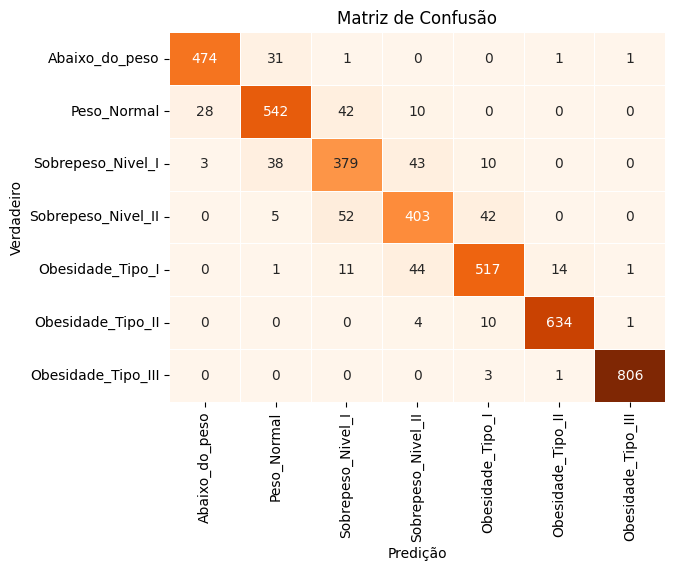

In [56]:
labels = ['Abaixo_do_peso', 
          'Peso_Normal', 
          'Sobrepeso_Nivel_I', 
          'Sobrepeso_Nivel_II', 
          'Obesidade_Tipo_I', 
          'Obesidade_Tipo_II', 
          'Obesidade_Tipo_III' ]
sns.heatmap(pd.DataFrame(confusion_matrix(y_pred, y_val)),annot=True, fmt= 'd', annot_kws = {'size': 10},
linewidths= 0.5, cmap = 'Oranges', cbar=False, xticklabels= labels, yticklabels=labels);
plt.title('Matriz de Confusão')
plt.ylabel('Verdadeiro')
plt.xlabel('Predição')
plt.show()

In [57]:
cm = confusion_matrix(y_val, y_pred)
cm_df = pd.DataFrame(cm, 
                     index=['Abaixo_do_peso', 
                            'Peso_Normal', 
                            'Sobrepeso_Nivel_I', 
                            'Sobrepeso_Nivel_II', 
                            'Obesidade_Tipo_I', 
                            'Obesidade_Tipo_II', 
                            'Obesidade_Tipo_III'],
                     columns=['Abaixo_do_peso', 
                              'Peso_Normal', 
                              'Sobrepeso_Nivel_I', 
                              'Sobrepeso_Nivel_II', 
                              'Obesidade_Tipo_I', 
                              'Obesidade_Tipo_II', 
                              'Obesidade_Tipo_III'])

# Cálculo de acertos por classe do modelo em percentual
acuracia_por_classe = np.diag(cm_df) / np.sum(cm_df, axis=1)
acuracia_por_classe = pd.Series(acuracia_por_classe, index=cm_df.index)


acuracia_por_classe = acuracia_por_classe * 100
print(acuracia_por_classe)


Abaixo_do_peso        93.861386
Peso_Normal           87.844408
Sobrepeso_Nivel_I     78.144330
Sobrepeso_Nivel_II    79.960317
Obesidade_Tipo_I      88.831615
Obesidade_Tipo_II     97.538462
Obesidade_Tipo_III    99.629172
dtype: float64


In [58]:
from sklearn.model_selection import cross_val_score

XGB_scores = cross_val_score(XGB, x_train, y_train, cv=5)
XGB_scores

array([0.90066225, 0.89671786, 0.90605239, 0.90484794, 0.90484794])

In [59]:
def mostrar_resultados(scores):
    print("Score:", scores.round(3))
    print("Média:", round(scores.mean(),3))
    print("Desvio padrão:", round(scores.std(),3))

mostrar_resultados(XGB_scores)

Score: [0.901 0.897 0.906 0.905 0.905]
Média: 0.903
Desvio padrão: 0.003


**NAIVE BAYES**

In [81]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


nb_classifier = GaussianNB()


nb_classifier.fit(x_train, y_train)


y_pred_nb = nb_classifier.predict(x_val)


accuracy_nb = accuracy_score(y_val, y_pred_nb)
report_nb = classification_report(y_val, y_pred_nb)

accuracy_percent_nb = round(100 * accuracy_nb, 2)

print("A acurácia do modelo Naive Bayes foi de {}%".format(accuracy_percent_nb))
print("Relatório de Classificação:\n", report_nb)

A acurácia do modelo Naive Bayes foi de 65.51%
Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.67      0.84      0.75       505
         1.0       0.60      0.43      0.50       617
         2.0       0.59      0.29      0.39       485
         3.0       0.50      0.26      0.34       504
         4.0       0.41      0.60      0.49       582
         5.0       0.70      0.92      0.79       650
         6.0       0.95      1.00      0.97       809

    accuracy                           0.66      4152
   macro avg       0.63      0.62      0.60      4152
weighted avg       0.65      0.66      0.63      4152



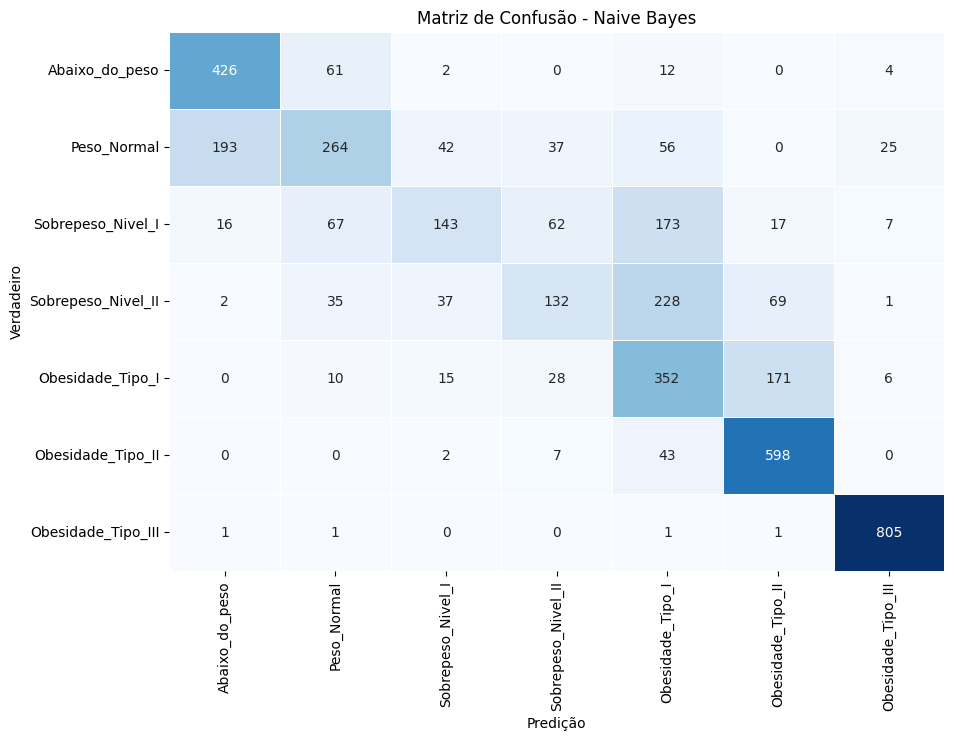

In [80]:
conf_mat_nb = confusion_matrix(y_val, y_pred_nb)


conf_mat_df = pd.DataFrame(conf_mat_nb, index=labels, columns=labels)


plt.figure(figsize=(10, 7))  
sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap='Blues', cbar=False,
            linewidths=0.5, annot_kws={'size': 10}, xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusão - Naive Bayes')
plt.ylabel('Verdadeiro')
plt.xlabel('Predição')
plt.show()

In [83]:
nb_classifier = GaussianNB()

scores_nb = cross_val_score(nb_classifier, X=x_train, y=y_train, cv=5)  # cv é o número de folds

mean_score_nb = scores_nb.mean()
std_deviation_score_nb = scores_nb.std()

print("Scors:", scores_nb)
print("Média:", round(mean_score_nb, 3))
print("Desvio padrão:", round(std_deviation_score_nb, 3))


Scors: [0.64930765 0.66365553 0.66726889 0.68051792 0.65281542]
Média: 0.663
Desvio padrão: 0.011


**SALVANDO O MODELO GBM (MAIOR ACURÁCIA)**

In [60]:
import joblib

In [61]:
joblib.dump(XGB, 'XGB.joblib')

['XGB.joblib']

In [62]:
modelo_carregado = joblib.load('XGB.joblib')

In [63]:
XGB_y_pred = modelo_carregado.predict(df_test)
XGB_y_pred

array([5, 2, 6, ..., 0, 1, 5])

In [64]:
modelo_resultados = pd.DataFrame({'id': test_id, 'NObeyesdad': XGB_y_pred})

In [65]:
dictionary = {0: 'Insufficient_Weight',
              1: 'Normal_Weight',
              2: 'Overweight_Level_I' ,
              3: 'Overweight_Level_II',
              4: 'Obesity_Type_I',
              5: 'Obesity_Type_II',
              6: 'Obesity_Type_III'
             }
modelo_resultados['NObeyesdad'] = modelo_resultados['NObeyesdad'].replace(dictionary)

In [66]:
modelo_resultados.head(7)

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
5,20763,Insufficient_Weight
6,20764,Insufficient_Weight


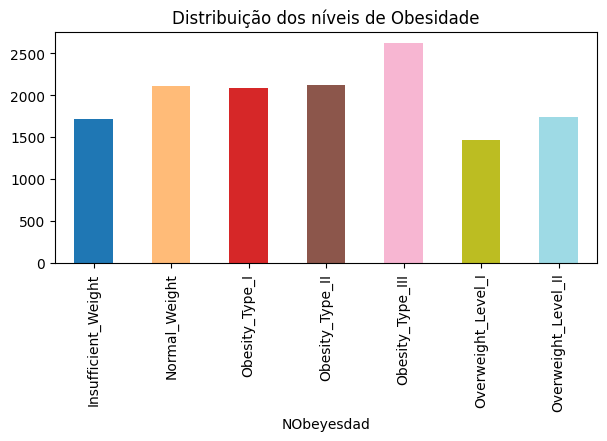

In [67]:
cmap = plt.get_cmap('tab20', df['NObeyesdad'].nunique())

ax = modelo_resultados['NObeyesdad'].value_counts().sort_index()\
    .plot(kind='bar',
          title='Distribuição dos níveis de Obesidade',
          figsize=(7, 3),
          color=[cmap(i) for i in range(df['NObeyesdad'].nunique())])

ax.set_xlabel('NObeyesdad')
plt.show()

In [68]:
count_nobeyesdad = modelo_resultados['NObeyesdad'].value_counts().sort_index()
print(count_nobeyesdad)


NObeyesdad
Insufficient_Weight    1710
Normal_Weight          2109
Obesity_Type_I         2082
Obesity_Type_II        2115
Obesity_Type_III       2622
Overweight_Level_I     1468
Overweight_Level_II    1734
Name: count, dtype: int64


In [69]:
modelo_resultados[['id','NObeyesdad']].to_csv('submission.csv', index=False)